In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from seaborn import plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from datetime import datetime
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
import scipy.stats as stats
import calendar

%matplotlib inline


In [2]:
df = pd.read_csv('animation_movies.csv')
df.head()

,Unnamed: 0,movie_name,domestic_gross,foreign_gross,world_gross,production_budget_x,release_date,distributor,runtime,rating,directors,writers,actors
0,0,Everyone's Hero,14523101.0,2104087.0,16627188,NaN,2006-09-15,Fox,88.0,G,[],[],"[u'Raven-Symone', u'Forest Whitaker']"
1,1,Fire and Ice,760883.0,NaN,857522,NaN,1983-08-26,GKIDS,93.0,PG,[],[],[]
2,2,Light Years,370698.0,12572253.0,12947880,NaN,1988-01-29,Eleven Arts,116.0,Unrated,[],[],[]
3,3,Ratchet & Clank,8821329.0,NaN,8821329,NaN,2016-04-29,Focus Features,94.0,PG,[],[],"[u'Rosario Dawson', u'Paul Giamatti', u'John G..."
4,4,Home (2015),177397510.0,208644097.0,386041607,135000000.0,2015-03-27,Fox,94.0,PG,[u'Tim Johnson'],"[u'Tom J. Astle', u'Matt Ember']","[u'Rihanna', u'Steve Martin', u'Jennifer Lopez']"


In [3]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['month'] = df['release_date'].dt.month
df['year'] = df['release_date'].dt.year
df.head()

,Unnamed: 0,movie_name,domestic_gross,foreign_gross,world_gross,production_budget_x,release_date,distributor,runtime,rating,directors,writers,actors,month,year
0,0,Everyone's Hero,14523101.0,2104087.0,16627188,NaN,2006-09-15,Fox,88.0,G,[],[],"[u'Raven-Symone', u'Forest Whitaker']",9,2006
1,1,Fire and Ice,760883.0,NaN,857522,NaN,1983-08-26,GKIDS,93.0,PG,[],[],[],8,1983
2,2,Light Years,370698.0,12572253.0,12947880,NaN,1988-01-29,Eleven Arts,116.0,Unrated,[],[],[],1,1988
3,3,Ratchet & Clank,8821329.0,NaN,8821329,NaN,2016-04-29,Focus Features,94.0,PG,[],[],"[u'Rosario Dawson', u'Paul Giamatti', u'John G...",4,2016
4,4,Home (2015),177397510.0,208644097.0,386041607,135000000.0,2015-03-27,Fox,94.0,PG,[u'Tim Johnson'],"[u'Tom J. Astle', u'Matt Ember']","[u'Rihanna', u'Steve Martin', u'Jennifer Lopez']",3,2015


In [4]:
df_cpi = pd.read_csv('cpi_values.csv')
df_cpi.index = df_cpi.Year
df_cpi.drop('Year', axis=1, inplace=True)
#yearly_cpi.columns = ['cpi']
df_cpi.columns

Index([u'Avg'], dtype='object')

In [5]:
cpi_2016 = int(df_cpi.loc[2016])

In [6]:
adjusted_df = df.merge(df_cpi, how='left', left_on='year', right_index=True)
adjusted_df.head()

,Unnamed: 0,movie_name,domestic_gross,foreign_gross,world_gross,production_budget_x,release_date,distributor,runtime,rating,directors,writers,actors,month,year,Avg
0,0,Everyone's Hero,14523101.0,2104087.0,16627188,NaN,2006-09-15,Fox,88.0,G,[],[],"[u'Raven-Symone', u'Forest Whitaker']",9,2006,201.600
1,1,Fire and Ice,760883.0,NaN,857522,NaN,1983-08-26,GKIDS,93.0,PG,[],[],[],8,1983,99.600
2,2,Light Years,370698.0,12572253.0,12947880,NaN,1988-01-29,Eleven Arts,116.0,Unrated,[],[],[],1,1988,118.300
3,3,Ratchet & Clank,8821329.0,NaN,8821329,NaN,2016-04-29,Focus Features,94.0,PG,[],[],"[u'Rosario Dawson', u'Paul Giamatti', u'John G...",4,2016,240.007
4,4,Home (2015),177397510.0,208644097.0,386041607,135000000.0,2015-03-27,Fox,94.0,PG,[u'Tim Johnson'],"[u'Tom J. Astle', u'Matt Ember']","[u'Rihanna', u'Steve Martin', u'Jennifer Lopez']",3,2015,237.017


In [7]:
df['domestic_gross'] = adjusted_df['domestic_gross']*cpi_2016/adjusted_df.Avg

In [8]:
df['foreign_gross'] = adjusted_df['foreign_gross']*cpi_2016/adjusted_df.Avg
df['production_budget_x'] = adjusted_df['production_budget_x']*cpi_2016/adjusted_df.Avg

In [9]:
df.head()

,Unnamed: 0,movie_name,domestic_gross,foreign_gross,world_gross,production_budget_x,release_date,distributor,runtime,rating,directors,writers,actors,month,year
0,0,Everyone's Hero,1.728941e+07,2.504865e+06,16627188,NaN,2006-09-15,Fox,88.0,G,[],[],"[u'Raven-Symone', u'Forest Whitaker']",9,2006
1,1,Fire and Ice,1.833453e+06,NaN,857522,NaN,1983-08-26,GKIDS,93.0,PG,[],[],[],8,1983
2,2,Light Years,7.520500e+05,2.550584e+07,12947880,NaN,1988-01-29,Eleven Arts,116.0,Unrated,[],[],[],1,1988
3,3,Ratchet & Clank,8.821072e+06,NaN,8821329,NaN,2016-04-29,Focus Features,94.0,PG,[],[],"[u'Rosario Dawson', u'Paul Giamatti', u'John G...",4,2016
4,4,Home (2015),1.796302e+08,2.112700e+08,386041607,1.366991e+08,2015-03-27,Fox,94.0,PG,[u'Tim Johnson'],"[u'Tom J. Astle', u'Matt Ember']","[u'Rihanna', u'Steve Martin', u'Jennifer Lopez']",3,2015


In [10]:
df = df.fillna("")

In [11]:
df = df.drop(['Unnamed: 0','release_date'],axis = 1)

In [12]:
df.columns = ['movie_name','domestic_gross','foreign_gross','world_gross','production_budget','distributor','runtime','rating','directors','writers','actors','month','year']

In [13]:
df.head()

,movie_name,domestic_gross,foreign_gross,world_gross,production_budget,distributor,runtime,rating,directors,writers,actors,month,year
0,Everyone's Hero,1.72894e+07,2.50487e+06,16627188,,Fox,88,G,[],[],"[u'Raven-Symone', u'Forest Whitaker']",9,2006
1,Fire and Ice,1.83345e+06,,857522,,GKIDS,93,PG,[],[],[],8,1983
2,Light Years,752050,2.55058e+07,12947880,,Eleven Arts,116,Unrated,[],[],[],1,1988
3,Ratchet & Clank,8.82107e+06,,8821329,,Focus Features,94,PG,[],[],"[u'Rosario Dawson', u'Paul Giamatti', u'John G...",4,2016
4,Home (2015),1.7963e+08,2.1127e+08,386041607,1.36699e+08,Fox,94,PG,[u'Tim Johnson'],"[u'Tom J. Astle', u'Matt Ember']","[u'Rihanna', u'Steve Martin', u'Jennifer Lopez']",3,2015


In [14]:
df.columns = df.columns.map(str.strip)
df.columns

Index([u'movie_name', u'domestic_gross', u'foreign_gross', u'world_gross',
       u'production_budget', u'distributor', u'runtime', u'rating',
       u'directors', u'writers', u'actors', u'month', u'year'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 13 columns):
movie_name           423 non-null object
domestic_gross       423 non-null object
foreign_gross        423 non-null object
world_gross          423 non-null int64
production_budget    423 non-null object
distributor          423 non-null object
runtime              423 non-null object
rating               423 non-null object
directors            423 non-null object
writers              423 non-null object
actors               423 non-null object
month                423 non-null int64
year                 423 non-null int64
dtypes: int64(3), object(10)
memory usage: 43.0+ KB


In [16]:
df['domestic_gross'] = pd.to_numeric(df['domestic_gross'])
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'])
df['production_budget'] = pd.to_numeric(df['production_budget'])
df['runtime'] = pd.to_numeric(df['runtime'])

In [17]:
df= df.dropna(axis = 0, how = 'any')

In [18]:
df.head()

,movie_name,domestic_gross,foreign_gross,world_gross,production_budget,distributor,runtime,rating,directors,writers,actors,month,year
4,Home (2015),1.796302e+08,2.112700e+08,386041607,1.366991e+08,Fox,94.0,PG,[u'Tim Johnson'],"[u'Tom J. Astle', u'Matt Ember']","[u'Rihanna', u'Steve Martin', u'Jennifer Lopez']",3,2015
5,Space Chimps,3.355937e+07,3.871269e+07,64834964,4.124420e+07,Fox,81.0,G,[u'Kirk De Micco'],[u'Kirk De Micco'],[u'Andy Samberg'],7,2008
6,Fantasia 2000 (IMAX),8.453717e+07,1.204181e+08,150406466,1.114983e+08,Warner Bros.,105.0,PG,[],[],[],1,2000
7,Lilo & Stitch,1.945005e+08,1.698941e+08,273144151,1.067260e+08,Buena Vista,85.0,PG,"[u'Dean DeBlois', u'Chris Sanders']","[u'Dean DeBlois', u'Chris Sanders']",[],6,2002
10,Bolt,1.271364e+08,2.184008e+08,309979994,1.672062e+08,Buena Vista,96.0,PG,[u'Chris Williams'],"[u'Dan Fogelman', u'Chris Williams']","[u'John Travolta', u'Miley Cyrus', u'Nick Swar...",11,2008


In [115]:
df.filter(like='R', axis=0)

,movie_name,domestic_gross,foreign_gross,world_gross,production_budget,distributor,runtime,rating,directors,writers,actors,month,year


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 4 to 420
Data columns (total 13 columns):
movie_name           216 non-null object
domestic_gross       216 non-null float64
foreign_gross        216 non-null float64
world_gross          216 non-null int64
production_budget    216 non-null float64
distributor          216 non-null object
runtime              216 non-null float64
rating               216 non-null object
directors            216 non-null object
writers              216 non-null object
actors               216 non-null object
month                216 non-null int64
year                 216 non-null int64
dtypes: float64(4), int64(3), object(6)
memory usage: 23.6+ KB


In [27]:
df_year = df.loc[:,['domestic_gross','year']]

In [31]:
df_year = df_year.sort_values('year')
df_year[1:50]

,domestic_gross,year
356,2.707041e+07,1983
205,4.748407e+07,1985
175,8.458150e+07,1986
306,3.174013e+08,1988
352,9.756790e+07,1988
327,1.070654e+06,1989
114,5.245167e+07,1989
339,5.128960e+07,1990
283,3.271665e+06,1990
264,3.728693e+07,1990


In [25]:
df_year.domestic_gross = pd.to_numeric(df_year['domestic_gross'])

In [38]:
mu = df_year.domestic_gross.mean()
mu

127324013.5567582

In [39]:
sigma = df_year.domestic_gross.std()
sigma

120455300.45290825

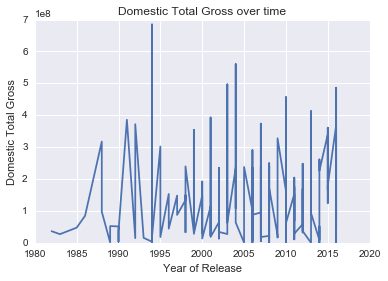

In [45]:

plt.plot(df_year.year, df_year.domestic_gross)
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter


plt.xlabel('Year of Release')
plt.ylabel('Domestic Total Gross')
plt.title('Domestic Total Gross over time')



plt.show()

In [86]:
df.rating.value_counts()

PG         145
G           54
PG-13        8
R            6
Unrated      3
Name: rating, dtype: int64

In [96]:
df_ratings = df.groupby('rating')['domestic_gross'].mean().astype(int)

In [118]:
df.groupby('rating').filter(like = 'R', axis = 0)

TypeError: filter() takes at least 2 arguments (1 given)

In [90]:
df_ratings 

rating
G           8715323636
PG         18178735192
PG-13        425982256
R            181940513
Unrated           5329
Name: domestic_gross, dtype: int64

In [98]:
PG = 125370587/145
G = 161394882/54
PG13 = 53247782/8
R = 30323418/6
Unrated = 1776/3

In [99]:
print G, PG,  PG13, R, Unrated

2988794 864624 6655972 5053903 592


In [97]:
df_ratings

rating
G          161394882
PG         125370587
PG-13       53247782
R           30323418
Unrated         1776
Name: domestic_gross, dtype: int64

In [48]:
df_ratings.G

8715323636

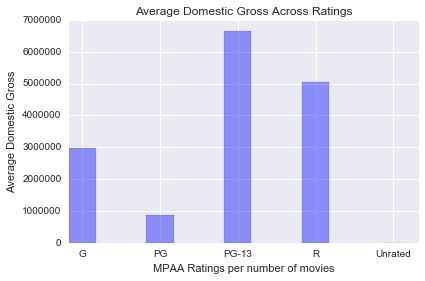

In [100]:




y = [2988794, 864624, 6655972, 5053903, 592]
x =range(len(y))


bar_width = 0.35

opacity = 0.4


plt.bar(x, y,bar_width,
                 alpha=opacity,
                 color='b')


plt.xlabel('MPAA Ratings per number of movies')
plt.ylabel('Average Domestic Gross')
plt.title('Average Domestic Gross Across Ratings')
plt.xticks(index+bar_width/2 , ('G', 'PG', 'PG-13', 'R', 'Unrated'))
plt.legend()

plt.tight_layout()
plt.show()

In [63]:
movies_month_ave = df.groupby('month')['domestic_gross'].mean()

In [106]:
freq_month = df.month.value_counts().sort_index()
freq_month

1      4
2     14
3     17
4     10
5     15
6     29
7     24
8     11
9     15
10    12
11    49
12    16
Name: month, dtype: int64

In [102]:
movies_month_ave = movies_month_ave.astype('int')
movies_month_ave

month
1      77811878
2      72746844
3     154484803
4      57940989
5     235516310
6     210928421
7     114131548
8      48267372
9      65014068
10     62587920
11    148734021
12     64539484
Name: domestic_gross, dtype: int64

In [112]:
ave_month_freq = movies_month_ave/freq_month
ave_month_freq

month
1     1.945297e+07
2     5.196203e+06
3     9.087341e+06
4     5.794099e+06
5     1.570109e+07
6     7.273394e+06
7     4.755481e+06
8     4.387943e+06
9     4.334271e+06
10    5.215660e+06
11    3.035388e+06
12    4.033718e+06
dtype: float64

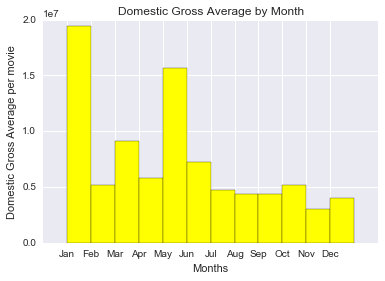

In [113]:
width = 1
month = [1,2,3,4,5,6,7,8,9,10,11,12]

plt.bar(month, ave_month_freq, color = 'yellow', width =1)

plt.bar
plt.xlabel('Months')
plt.ylabel('Domestic Gross Average per movie')
bar_width = 0.35
plt.xticks(month,['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Domestic Gross Average by Month')


plt.show()